<a href="https://colab.research.google.com/github/GuptaNavdeep1983/CS688/blob/main/Question4-AssociationRuleMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("easyPubMed")
install.packages("tm")
install.packages("qdap")
install.packages("arules")
install.packages("arulesSequences")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘data.table’, ‘openNLPdata’, ‘rJava’, ‘zip’, ‘bitops’, ‘plyr’, ‘qdapDictionaries’, ‘qdapRegex’, ‘qdapTools’, ‘chron’, ‘gender’, ‘gridExtra’, ‘igraph’, ‘openNLP’, ‘openxlsx’, ‘plotrix’, ‘RCurl’, ‘reshape2’, ‘stringdist’, ‘venneuler’, ‘wordcloud’, ‘XML’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("arulesViz")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘zoo’, ‘foreach’, ‘viridis’, ‘gtools’, ‘caTools’, ‘lmtest’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘hexbin’, ‘scatterplot3d’, ‘vcd’, ‘seriation’, ‘plotly’, ‘visNetwork’




In [ ]:
all_years <- read.csv('pubmed_results.csv')
all_years 

In [ ]:
# @title Find unique records
all_years <- unique(all_years)
all_years

In [5]:
# @title Reindex
row.names(all_years) <- NULL

Loading required package: qdapDictionaries

Loading required package: qdapRegex

Loading required package: qdapTools

Loading required package: RColorBrewer


Attaching package: ‘qdap’


The following objects are masked from ‘package:base’:

    Filter, proportions




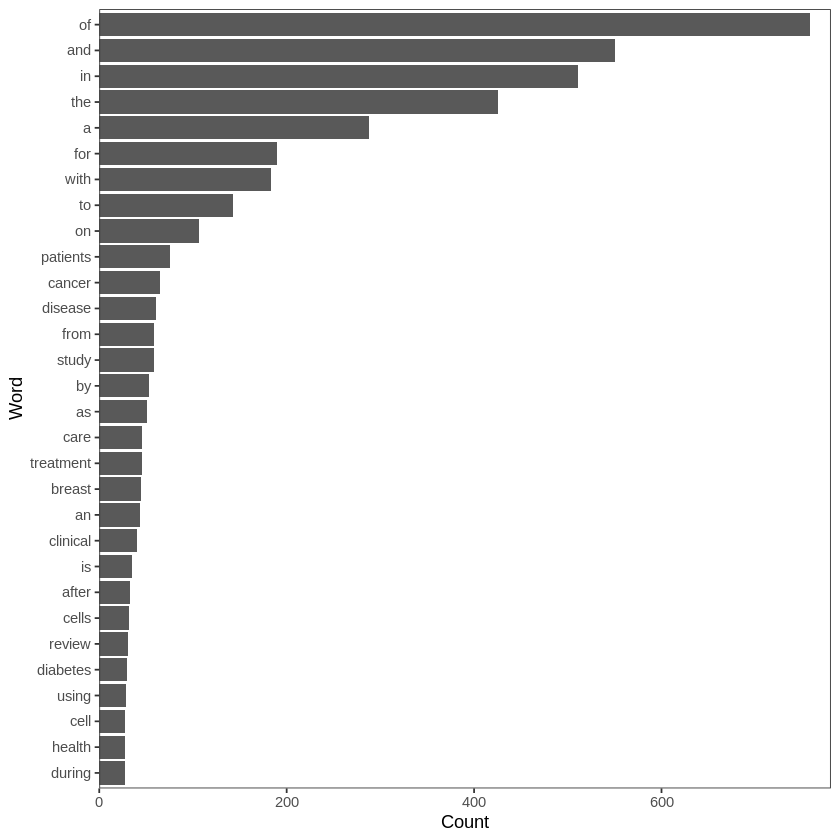

In [6]:
library(qdap)
frequent_terms <- freq_terms(all_years$title, 30)
plot(frequent_terms)

In [7]:
library(tm)
text_vec <- VectorSource(all_years$title)
vec_corpus <- VCorpus(text_vec)

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:qdap’:

    ngrams



Attaching package: ‘tm’


The following objects are masked from ‘package:qdap’:

    as.DocumentTermMatrix, as.TermDocumentMatrix




In [8]:
clean_corpus <- function(corpus){
  corpus <- tm_map(corpus, stripWhitespace)
  corpus <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, removeNumbers)
  corpus <- tm_map(corpus, content_transformer(tolower))
  corpus <- tm_map(corpus, removeWords, stopwords("en"))
  print(corpus)
    return(corpus)
}
# Apply your customized function to the tweet_corp: clean_corp
clean_corp <- clean_corpus(vec_corpus)
clean_corp

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1000


<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1000

In [9]:
# @title Create the DTM from the corpus: 
pubmed_dtm <- DocumentTermMatrix(clean_corp)
# Print out tweets_dtm data
pubmed_dtm

<<DocumentTermMatrix (documents: 1000, terms: 4448)>>
Non-/sparse entries: 8921/4439079
Sparsity           : 100%
Maximal term length: 34
Weighting          : term frequency (tf)

In [10]:
# Since the sparsity is so high, i.e. a proportion of cells with 0s/ cells with other values is too large,
# let's remove some of these low frequency terms
pubmed_dtm_rm_sparse <- removeSparseTerms(pubmed_dtm, 0.98)
# Convert to a matrix: 
pubmed_m <- as.matrix(pubmed_dtm_rm_sparse)
# Print the dimensions
dim(pubmed_m)
# Review a portion of the matrix
# pubmed_m[0:10, 0:100]

[1] 1000   28

In [ ]:
library(arules)
library(tm)
rules <- apriori (pubmed_m, parameter = list(supp = 0.001, conf = 0.5))
summary(rules)

In [39]:
rules_conf <- sort (rules, by="confidence", decreasing=TRUE) # 'high-confidence' rules.
summary(rules_conf)
arules::inspect(rules_conf)

set of 458 rules

rule length distribution (lhs + rhs):sizes
  2   3   4   5 
  2 251 175  30 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   3.509   4.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001000   Min.   :0.5000   Min.   :0.001000   Min.   : 6.579  
 1st Qu.:0.001000   1st Qu.:0.5000   1st Qu.:0.001000   1st Qu.:16.129  
 Median :0.001000   Median :1.0000   Median :0.001000   Median :21.739  
 Mean   :0.001194   Mean   :0.8271   Mean   :0.001651   Mean   :24.939  
 3rd Qu.:0.001000   3rd Qu.:1.0000   3rd Qu.:0.002000   3rd Qu.:38.462  
 Max.   :0.013000   Max.   :1.0000   Max.   :0.024000   Max.   :47.619  
     count       
 Min.   : 1.000  
 1st Qu.: 1.000  
 Median : 1.000  
 Mean   : 1.194  
 3rd Qu.: 1.000  
 Max.   :13.000  

mining info:
     data ntransactions support confidence
 pubmed_m          1000   0.001        0.5

      lhs                                  rhs           support confidence
[1]   {effects,potential}               => {new}         0.001   1.0000000 
[2]   {effects,new}                     => {potential}   0.001   1.0000000 
[3]   {new,potential}                   => {effects}     0.001   1.0000000 
[4]   {effects,potential}               => {therapy}     0.001   1.0000000 
[5]   {effects,therapy}                 => {potential}   0.001   1.0000000 
[6]   {effects,new}                     => {therapy}     0.001   1.0000000 
[7]   {effects,therapy}                 => {new}         0.001   1.0000000 
[8]   {effects,using}                   => {study}       0.001   1.0000000 
[9]   {breast,effects}                  => {among}       0.001   1.0000000 
[10]  {cancer,effects}                  => {among}       0.001   1.0000000 
[11]  {breast,effects}                  => {cancer}      0.001   1.0000000 
[12]  {cancer,effects}                  => {breast}      0.001   1.0000000 
[13]  {new,p

In [46]:
subrules2 <- head(rules_conf, n = 40, by = "confidence")


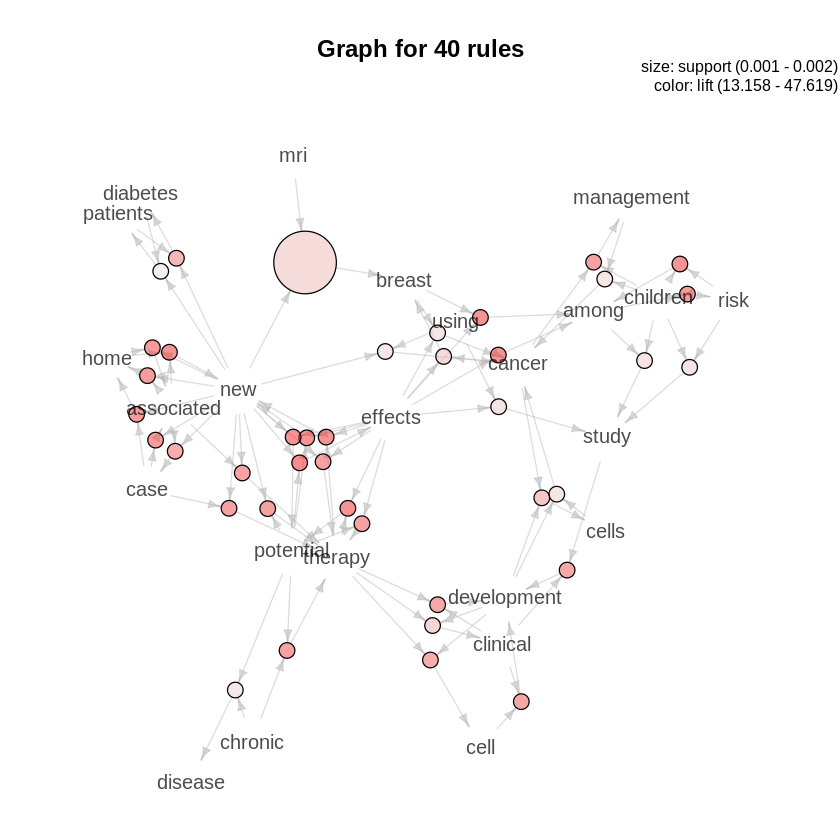

In [47]:
 library(arulesViz)
 plot(subrules2, method = "graph")

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



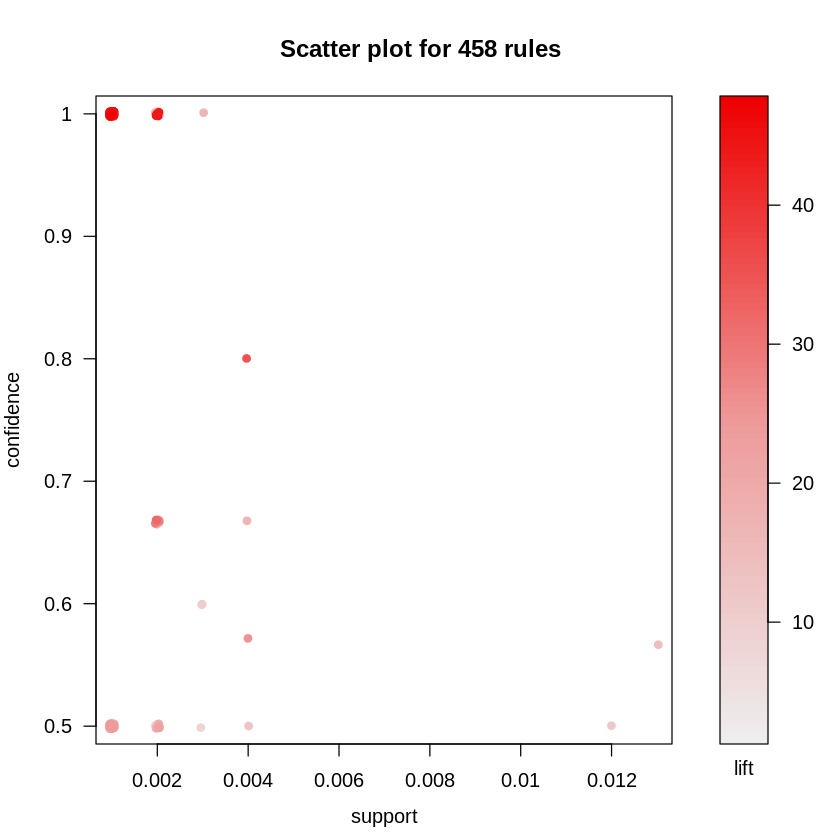

In [36]:
plot(rules)

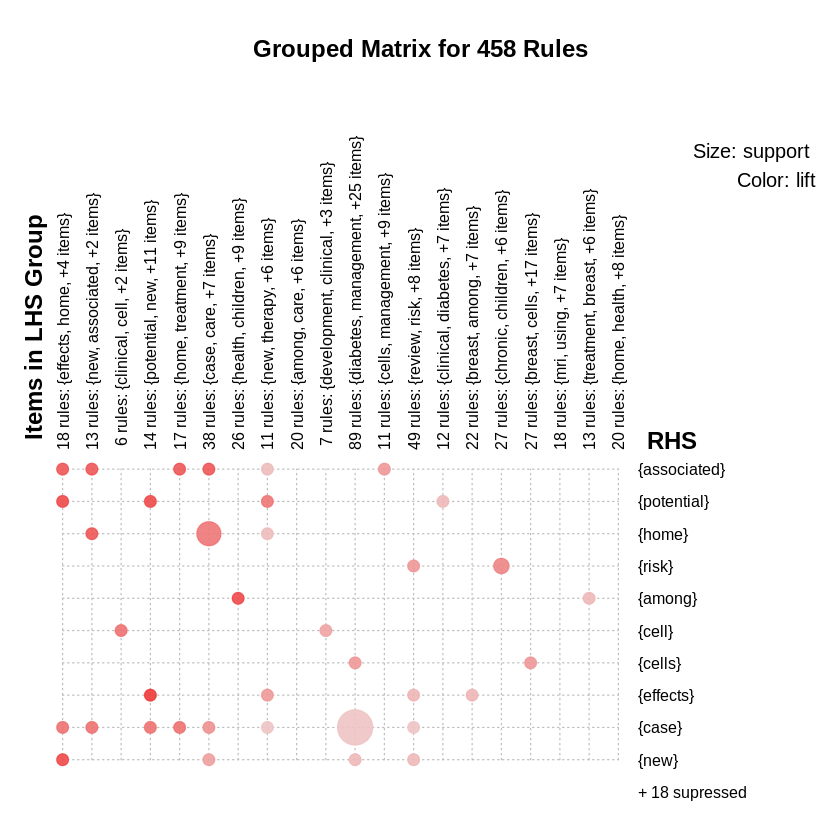

In [38]:
# plot(rules, method = "matrix", engine = "htmlwidget")
plot(rules, method = "grouped matrix")


In [24]:
rules_lift <- sort (rules, by="support", decreasing=TRUE) # 'high-lift' rules.

arules::inspect(rules_lift)

      lhs                                  rhs           support confidence
[1]   {home}                            => {care}        0.013   0.5652174 
[2]   {mri}                             => {breast}      0.012   0.5000000 
[3]   {cancer,home}                     => {care}        0.004   0.5000000 
[4]   {cancer,care}                     => {home}        0.004   0.8000000 
[5]   {home,patients}                   => {care}        0.004   0.6666667 
[6]   {care,patients}                   => {home}        0.004   0.5714286 
[7]   {breast,cells}                    => {cancer}      0.003   1.0000000 
[8]   {chronic,patients}                => {disease}     0.003   0.6000000 
[9]   {home,patients}                   => {cancer}      0.003   0.5000000 
[10]  {cancer,care}                     => {patients}    0.003   0.6000000 
[11]  {children,treatment}              => {study}       0.002   0.5000000 
[12]  {children,study}                  => {treatment}   0.002   0.5000000 
[13]  {study